In [7]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [8]:
from google.colab import files 

upload = files.upload()

Saving wc_regr.csv to wc_regr.csv


In [9]:
data = pd.read_csv("wc_regr.csv")
data.head(500)

,Area (km^2),Investigated Before,Distance to port,24Hr Power,Location,Cost
0,2.889,yes,46.648901,no,Location 3,62.488175
1,1.000,yes,45.536261,no,Location 2,12.560815
2,2.833,no,51.610558,no,Location 3,24.386175
3,3.111,yes,59.525692,no,Location 1,27.359963
4,3.556,yes,45.608195,no,Location 2,35.223461
...,...,...,...,...,...,...
255,1.944,no,56.218761,no,Location 2,17.443964
256,1.444,no,56.954915,yes,Location 2,36.726059
257,3.167,no,62.194093,no,Location 1,27.185580
258,1.222,yes,52.894737,no,Location 4,14.299712


In [10]:
data.columns

Index(['Area (km^2)', 'Investigated Before', 'Distance to port', '24Hr Power',
       'Location', 'Cost'],
      dtype='object')

In [11]:
data["Location"].value_counts()

Location 2    72
Location 3    64
Location 4    64
Location 1    60
Name: Location, dtype: int64

In [12]:
data.shape

(260, 6)

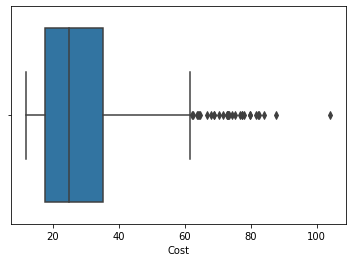

In [13]:
sns.boxplot(x=data["Cost"])

In [14]:
from sklearn.preprocessing import OrdinalEncoder

ord_enc = OrdinalEncoder()
data["Investigated Before"] = ord_enc.fit_transform(data[["Investigated Before"]])
data.head()

,Area (km^2),Investigated Before,Distance to port,24Hr Power,Location,Cost
0,2.889,1.0,46.648901,no,Location 3,62.488175
1,1.000,1.0,45.536261,no,Location 2,12.560815
2,2.833,0.0,51.610558,no,Location 3,24.386175
3,3.111,1.0,59.525692,no,Location 1,27.359963
4,3.556,1.0,45.608195,no,Location 2,35.223461


In [15]:
data["24Hr Power"] = ord_enc.fit_transform(data[["24Hr Power"]])
data.head()

,Area (km^2),Investigated Before,Distance to port,24Hr Power,Location,Cost
0,2.889,1.0,46.648901,0.0,Location 3,62.488175
1,1.000,1.0,45.536261,0.0,Location 2,12.560815
2,2.833,0.0,51.610558,0.0,Location 3,24.386175
3,3.111,1.0,59.525692,0.0,Location 1,27.359963
4,3.556,1.0,45.608195,0.0,Location 2,35.223461


In [16]:
data_loc_dummies= pd.get_dummies(data.Location)
data = pd.concat([data, data_loc_dummies], axis=1)
data.head()  

,Area (km^2),Investigated Before,Distance to port,24Hr Power,Location,Cost,Location 1,Location 2,Location 3,Location 4
0,2.889,1.0,46.648901,0.0,Location 3,62.488175,0,0,1,0
1,1.000,1.0,45.536261,0.0,Location 2,12.560815,0,1,0,0
2,2.833,0.0,51.610558,0.0,Location 3,24.386175,0,0,1,0
3,3.111,1.0,59.525692,0.0,Location 1,27.359963,1,0,0,0
4,3.556,1.0,45.608195,0.0,Location 2,35.223461,0,1,0,0


In [17]:
data = data.drop(["Location"], axis=1)
data.head()

,Area (km^2),Investigated Before,Distance to port,24Hr Power,Cost,Location 1,Location 2,Location 3,Location 4
0,2.889,1.0,46.648901,0.0,62.488175,0,0,1,0
1,1.000,1.0,45.536261,0.0,12.560815,0,1,0,0
2,2.833,0.0,51.610558,0.0,24.386175,0,0,1,0
3,3.111,1.0,59.525692,0.0,27.359963,1,0,0,0
4,3.556,1.0,45.608195,0.0,35.223461,0,1,0,0


In [18]:
X=data.drop(["Cost"],axis=1)
Y=data["Cost"]
X

,Area (km^2),Investigated Before,Distance to port,24Hr Power,Location 1,Location 2,Location 3,Location 4
0,2.889,1.0,46.648901,0.0,0,0,1,0
1,1.000,1.0,45.536261,0.0,0,1,0,0
2,2.833,0.0,51.610558,0.0,0,0,1,0
3,3.111,1.0,59.525692,0.0,1,0,0,0
4,3.556,1.0,45.608195,0.0,0,1,0,0
...,...,...,...,...,...,...,...,...
255,1.944,0.0,56.218761,0.0,0,1,0,0
256,1.444,0.0,56.954915,1.0,0,1,0,0
257,3.167,0.0,62.194093,0.0,1,0,0,0
258,1.222,1.0,52.894737,0.0,0,0,0,1


In [19]:
Y = pd.DataFrame(Y, columns=["Cost"])
Y

,Cost
0,62.488175
1,12.560815
2,24.386175
3,27.359963
4,35.223461
...,...
255,17.443964
256,36.726059
257,27.185580
258,14.299712


In [20]:
from sklearn.preprocessing import RobustScaler
Robust= RobustScaler()
X_scaled = Robust.fit_transform(X)
X_scaled=pd.DataFrame(X_scaled, columns=['Area (km^2)', 'Investigated Before', 'Distance to port', '24Hr Power',
       'Location 1',"Location 2","Location 3","Location 4"])
X_scaled.head()


,Area (km^2),Investigated Before,Distance to port,24Hr Power,Location 1,Location 2,Location 3,Location 4
0,0.500375,0.0,-0.616445,0.0,0.0,0.0,1.0,0.0
1,-0.916729,0.0,-0.732892,0.0,0.0,1.0,0.0,0.0
2,0.458365,-1.0,-0.097162,0.0,0.0,0.0,1.0,0.0
3,0.666917,0.0,0.731230,0.0,1.0,0.0,0.0,0.0
4,1.000750,0.0,-0.725364,0.0,0.0,1.0,0.0,0.0


In [21]:
X_train = X_scaled[:200]
X_test = X_scaled[200:]
Y_train = Y[:200]
Y_test = Y[200:]

In [22]:
X_train

,Area (km^2),Investigated Before,Distance to port,24Hr Power,Location 1,Location 2,Location 3,Location 4
0,0.500375,0.0,-0.616445,0.0,0.0,0.0,1.0,0.0
1,-0.916729,0.0,-0.732892,0.0,0.0,1.0,0.0,0.0
2,0.458365,-1.0,-0.097162,0.0,0.0,0.0,1.0,0.0
3,0.666917,0.0,0.731230,0.0,1.0,0.0,0.0,0.0
4,1.000750,0.0,-0.725364,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...
195,0.500375,0.0,-0.262578,0.0,1.0,0.0,0.0,0.0
196,-0.541635,0.0,-0.056939,0.0,0.0,0.0,1.0,0.0
197,-0.916729,-1.0,-0.731527,0.0,0.0,0.0,0.0,1.0
198,0.000000,-1.0,0.767517,0.0,0.0,1.0,0.0,0.0


In [23]:
from sklearn.metrics import mean_squared_error

In [24]:
from sklearn.linear_model import LinearRegression

linear = LinearRegression()
linear.fit(X_train, Y_train)

linear.score(X_test, Y_test)

0.811420708780829

In [25]:
from sklearn.linear_model import Ridge

rge = Ridge()
rge.fit(X_train, Y_train)

rge.score(X_test, Y_test)

0.8072436146011759

In [26]:
from sklearn.neural_network import MLPRegressor

mlpr = MLPRegressor(solver='lbfgs', alpha=1e-5,
            hidden_layer_sizes=(5, 2), random_state=1, max_iter=5000)
mlpr.fit(X_train,Y_train)

mlpr.score(X_test,Y_test)

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1342: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.8530233968949227

In [27]:
from sklearn.ensemble import RandomForestRegressor
rfr = RandomForestRegressor()
rfr.fit(X_train, Y_train)

rfr.score(X_test, Y_test)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until


0.8997032938385721

In [28]:
from tensorflow.keras.models import Sequential 
from tensorflow.keras.layers import Dense 

In [29]:
model = Sequential([
                    Dense(10, activation='relu', input_shape=[8]),
                    Dense(8, activation='relu'),
                    Dense(1)
])

In [30]:
model.compile(
    optimizer='adam',
    loss='mse',    
)

In [31]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_4 (Dense)              (None, 10)                90        
_________________________________________________________________
dense_5 (Dense)              (None, 8)                 88        
_________________________________________________________________
dense_6 (Dense)              (None, 1)                 9         
Total params: 187
Trainable params: 187
Non-trainable params: 0
_________________________________________________________________


In [32]:
model.fit(X_train,Y_train, epochs=100, batch_size=64, verbose=0)

In [35]:
error = model.evaluate(X_test, Y_test, verbose=0)
print('MSE: %.3f, RMSE: %.3f' % (error, sqrt(error)))

MSE: 513.733, RMSE: 22.666


In [34]:
from numpy import sqrt